In [1]:
!rm /App/output/aggregated_30.csv
!rm -rf /App/output/train_30
!mkdir /App/output/train_30

rm: cannot remove '/App/output/aggregated_30.csv': No such file or directory


In [2]:
%%bash
rm /App/logs/client.logs
echo 135980 > /App/output/train_30/validate_135980.csv
for i in $(seq 1 200)
do
cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_135980_steps.h5f --rtt 30 --valid_congestion 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_30/validate_135980.csv
done

*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 83, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong)
  File "/App/mininettest/congestiontest.py", line 71, in do_training
    exec_test(server_cmd, rtt)
  File "/App/mininettest/congestiontest.py", line 28, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 22, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 444, in build
    self.buildFromTopo( self.topo )
  File "/usr/lib/python2.7/dist-pac

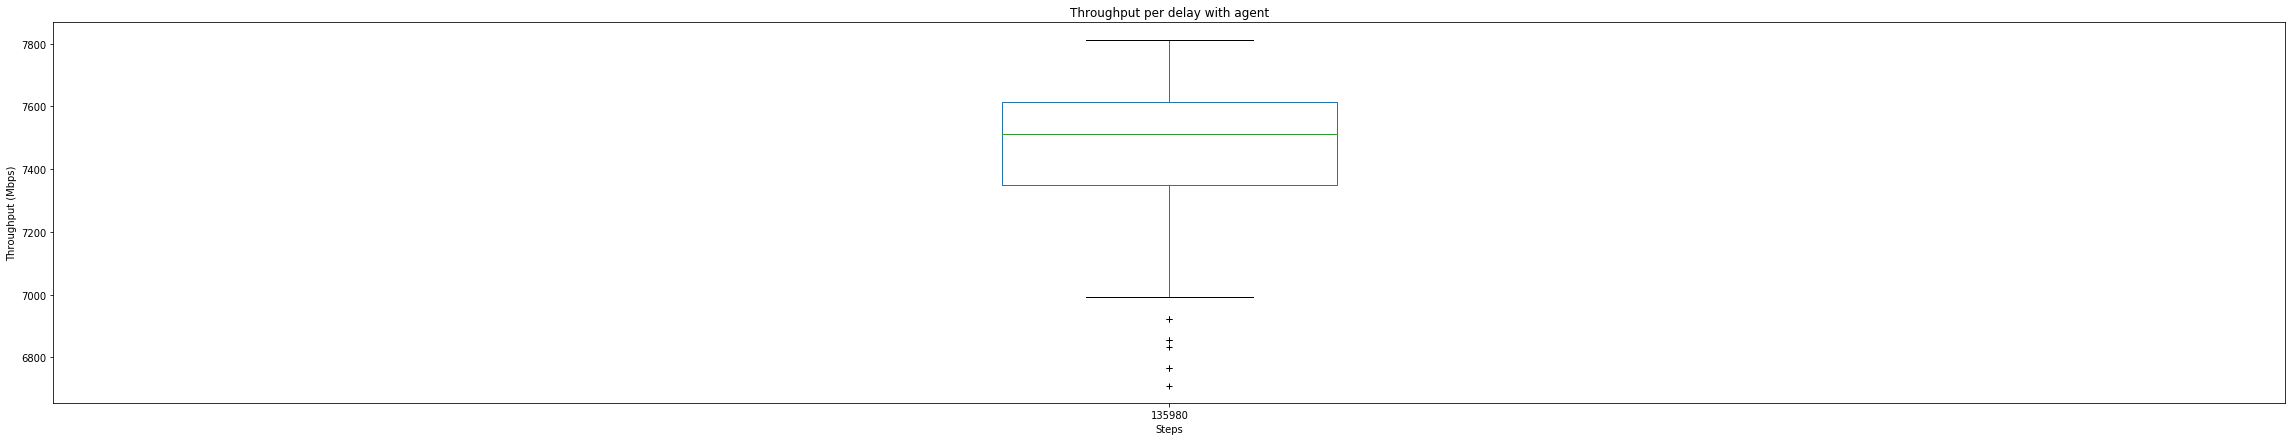

In [3]:
import pandas

rtt_135980 = pandas.read_csv("/App/output/train_30/validate_135980.csv")

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(40, 7)

(2*8 * 1024 * 1024 / rtt_135980).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")


In [4]:
(2*8 * 1024 * 1024 / rtt_135980).median()

135980    7513.614417
dtype: float64

In [5]:
(2*8 * 1024 * 1024 / rtt_135980).mean()

135980    7460.743408
dtype: float64